# DM 2024-25, BE2
## Equivalence RepTree en Python
### <font color="red"> Version élèves </font>

L'algorithme **REPTree** de Weka est un classificateur d'arbre de décision basé sur le concept  *reduced error pruning* (élagage réduit des erreurs), généralement utilisé pour les tâches de classification.       
Scikit-learn n'a pas  d'équivalent direct nommé "REPTree" mais on peut obtenir des fonctionnalités similaires en utilisant des classificateurs d'arbre de décision avec élagage dans Scikit-learn. Vous trouverez ci-dessous un aperçu de la façon dont vous pouvez aborder cela :

### 1. **REPTree dans Weka**
- L'algorithme **REPTree** de Weka construit un arbre de décision. Il fait "pousser" l'arbre jusqu'à ce qu'il satisfasse à un critère d'arrêt, puis l'élague pour éviter un surajustement.
- Il effectue un *reduced error pruning* (élagage à erreur réduite), qui fonctionne en supprimant les branches qui n'améliorent pas de manière significative les performances de classification.

### 2. **Équivalent dans Scikit-learn :**
Dans Scikit-learn, vous pouvez utiliser le `DecisionTreeClassifier` et appliquer des techniques d'élagage telles que *cost-complexity pruning* (l'élagage de complexité de coût) pour obtenir un résultat similaire.

#### Étapes pour imiter REPTree dans Scikit-learn : voir ci-dessous, après la création de l'arbre de décision


##### On importe les données "weather" et on crée la'arbre de décision avant de sintresser à l'éh$lagae.

In [ ]:
# Les libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Pour tout afficher (sans print)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load, préparation et création d'arbre de décision (weather)

In [51]:
# L'encodage : 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["yes", "no", "sunny", "overcast", "rainy", "hot", "mild","cool", "high", "normal", "False", "True"])


LabelEncoder()

In [52]:
# Vérifications
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
# Ou comme ceci : dictionary = dict(zip(le.classes_, le.transform(le.classes_)))
print(dictionary)

{np.str_('False'): np.int64(0), np.str_('True'): np.int64(1), np.str_('cool'): np.int64(2), np.str_('high'): np.int64(3), np.str_('hot'): np.int64(4), np.str_('mild'): np.int64(5), np.str_('no'): np.int64(6), np.str_('normal'): np.int64(7), np.str_('overcast'): np.int64(8), np.str_('rainy'): np.int64(9), np.str_('sunny'): np.int64(10), np.str_('yes'): np.int64(11)}


In [53]:
col_names = ['outlook', 'temperature', 'humidity', 'windy', 'play']
df = pd.read_csv("weather.csv") # Eventuellement ,  encoding="utf-16")  
# par défaut : header = 'infer' (il prend la 1e ligne comme header)
# voir aussi true_values=None, false_values=None, (pour la conversion de la col windy)
# le paramètre usecols= ['outlook', 'temperature', 'humidity', 'windy', 'play'] peut être donné.
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [54]:
# Convertir d'abord True / False de "windy" en 1/0
import numpy as np
df["windy"] = df["windy"].astype(int)
#df["windy"] = np.where(df["windy"]==True, 1, 0) # si = True alors 1 sinon 0

df_encode=pd.DataFrame([]) # il a fallu ajouter cela sous Mac !

# Convertir les autres colonnes (on peut donner explicitement les noms des cols)
for lab in df.columns.values :
    if lab == "windy" : 
        df_encode["windy"]=df["windy"]
        continue # déjà fait 
    res=le.transform(df[lab])
    df_encode[lab]=res

df_encode

,outlook,temperature,humidity,windy,play
0,10,4,3,0,6
1,10,4,3,1,6
2,8,4,3,0,11
3,9,5,3,0,11
4,9,2,7,0,11
5,9,2,7,1,6
6,8,2,7,1,11
7,10,5,3,0,6
8,10,2,7,0,11
9,9,5,7,0,11


In [55]:
feature_cols = col_names[:-1] # tout sauf dernière colonne
X = df_encode[feature_cols] # Features
y = df_encode.play # Target variable
X, y;  # le ";" pour éviter les affichages

In [56]:
# Diviser le dataset en training set et test set : 80% et 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
X_test.head()


,outlook,temperature,humidity,windy
3,9,5,3,0
7,10,5,3,0
6,8,2,7,1


In [57]:
from sklearn.tree import DecisionTreeClassifier
   
clf_gini = DecisionTreeClassifier(ccp_alpha=0.01)  # (indice GINI), Example d'élagage en utilisant ccp_alpha
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [58]:
y_pred_gini = clf_gini.predict(X_test)
"les prédiction de l'ensemble de test", y_pred_gini

("les prédiction de l'ensemble de test", array([ 6,  6, 11]))

In [59]:
# Comparaison entre la BD et les prédiction sur l'ensemble de test
print("Test labels :", le.inverse_transform(y_test))
print("Pred labels :", le.inverse_transform(y_pred_gini))

Test labels : ['yes' 'no' 'yes']
Pred labels : ['no' 'no' 'yes']


In [60]:
# ======Le rapport ======
from sklearn.metrics import classification_report
# Predicting the values of test data
print("\n\nClassification report - \n", classification_report(y_test,y_pred_gini))



Classification report - 
               precision    recall  f1-score   support

           6       0.50      1.00      0.67         1
          11       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



True

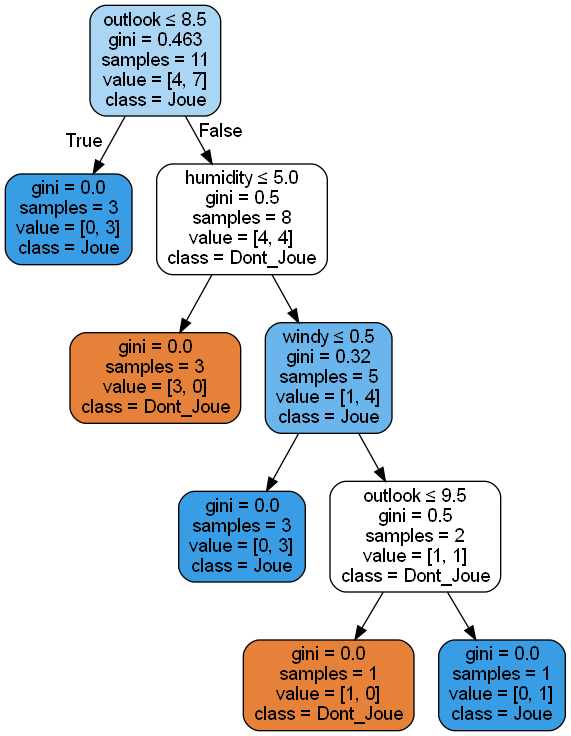

In [61]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue', 'Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('\n',''))  
graph.write_png('meteo-gini.png')
Image(graph.create_png())

#### Étapes pour imiter REPTree dans Scikit-learn :
1. **Classificateur d'arbre de décision** :
   - Utilisez `DecisionTreeClassifier` pour créer un arbre de décision.
   
2. **Elagage** :
   - Définissez `max_degree`, `min_samples_split`, `min_samples_leaf` ou `ccp_alpha` pour élaguer l'arbre.
   - L'élagage *cost-complexity pruning* (élagage coût-complexité, via `ccp_alpha`) est particulièrement utile, où vous spécifiez le paramètre de complexité pour contrôler le surajustement.      
   <font color="red"> Un **ccp_alpha** plus élevé signifie plus d'élagage.</font>    

3. **Élagage d'erreur réduit (spécifique à REPTree)** :
   - Scikit-learn n'a pas d'équivalent exact pour l'élagage réduit des erreurs de Weka, mais vous pouvez expérimenter la validation croisée et élaguer votre arbre pour optimiser les performances.

In [62]:

# Initialisation de DecisionTreeClassifier avec le paramètre d'élagage
clf_gini2 = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.1)  # was 0.01, On peut ajuster ces params
clf_gini2.fit(X_train, y_train)

# Evaluate the model
accuracy = clf_gini2.score(X_test, y_test)
print(f"Accuracy du modèle : {accuracy:.2f}")

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5)

Accuracy du modèle : 0.67


#### On constate que l'accuracy ne change pas

True

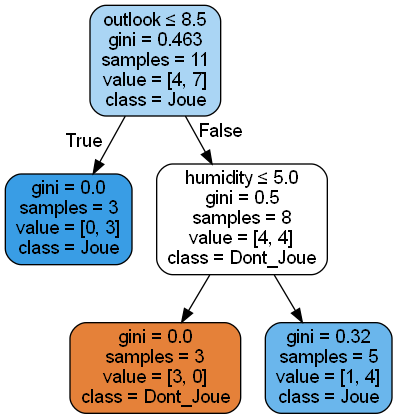

In [63]:
dot_data = StringIO()
export_graphviz(clf_gini2, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue', 'Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('\n',''))  
graph.write_png('meteo-gini2.png')
Image(graph.create_png())

### Paramètres clés pour l'élagage :
- **max_depth** : Limite la profondeur de l'arborescence. Une profondeur plus petite pourrait réduire le surapprentissage.
- **min_samples_split** : nombre minimum d'instances requis pour diviser un nœud.
- **min_samples_leaf** : nombre minimum d'instances requis pour se trouver sur un nœud feuille.
- **ccp_alpha** : Élagage cout-complexité pour contrôler l'élagage de l'arbre.

**Si vous avez besoin** d'un réglage plus fin, vous pouvez modifier les paramètres tels que "max_depth", "min_samples_split" et "min_samples_leaf".

In [64]:
clf_gini3 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
clf_gini3.fit(X_train, y_train)

# Evaluate the model
accuracy = clf_gini3.score(X_test, y_test)
print(f"Accuracy du modèle : {accuracy:.2f}")

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

Accuracy du modèle : 0.67


#### Toujours la même accuracy

True

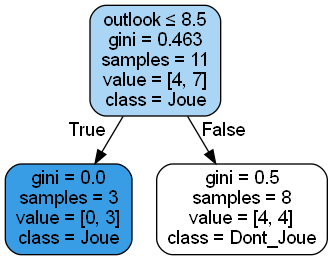

In [65]:
dot_data = StringIO()
export_graphviz(clf_gini3, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue', 'Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('\n',''))  
graph.write_png('meteo-gini3.png')
Image(graph.create_png())

## Suite : d'autres tests

In [66]:
from sklearn.metrics import accuracy_score
clf_gini4 = DecisionTreeClassifier(random_state=42,max_depth=2)

# Train the model
clf_gini4.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf_gini4.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

DecisionTreeClassifier(max_depth=2, random_state=42)

Accuracy: 0.6666666666666666


### Toujours la même accuracy

True

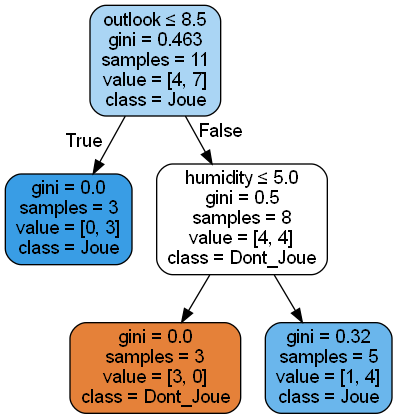

In [67]:
dot_data = StringIO()
export_graphviz(clf_gini4, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue', 'Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('\n',''))  
graph.write_png('meteo-gini4.png')
Image(graph.create_png())

## Alternatives :
Si vous recherchez un ensemble d'arbres de décision avec un surajustement réduit et une précision accrue, vous pouvez essayer  "ExtraTreesClassifier", qui utilise plusieurs randomisations des données.